In [1]:
import pandas as pd
col_names = ['set','bonafide_or_spoof','language','singer','title','url','views','likes','comments']
pdata = pd.read_csv('singfake_eda.csv', skiprows=1, names=col_names)
pdata.head(10)

,set,bonafide_or_spoof,language,singer,title,url,views,likes,comments
0,Training,0,Mandarin,Stefanie_Sun,尚好的青春-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=19,3335891,28129,1038
1,Training,0,Mandarin,Hebe_Tien,【首播】田馥甄 - 灵魂伴侣 - 官方MV,https://www.bilibili.com/video/BV18s411k7K3/?s...,152316,1329,173
2,T01,0,Mandarin,Stefanie_Sun,【私藏馆】孙燕姿《遇见》爆火神曲！祝大家节日快乐！,https://www.bilibili.com/video/BV1Q44y1M7bB/?s...,7920420,132851,3827
3,Training,0,Mandarin,Mayday,Mayday五月天【星空】MV官方完整版-電影「星空」主題曲,https://www.youtube.com/watch?v=RTUwaCImChM,44845261,112283,4765
4,Training,0,Mandarin,Stefanie_Sun,害怕-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=...,3335894,28129,1038
5,T02,0,Mandarin,Teresa_Teng,邓丽君演唱《红豆》歌声悠扬，经典动听，让人回味无穷,https://www.bilibili.com/video/BV1LV4y1P7yJ/?s...,6106,28,10
6,Training,0,Mandarin,Hebe_Tien,【田馥甄】终身大事-2014 Live「2GETHER 4EVER ENCORE影音館」,https://www.bilibili.com/video/BV1os411B7NN/?s...,50649,590,67
7,Training,0,Mandarin,Hebe_Tien,田馥甄 - 要死就一定要死在你手里【梦想的声音】,https://www.bilibili.com/video/BV1Wx411n74G/?s...,166100,919,107
8,Training,0,Mandarin,Jay_Chou,周杰倫 Jay Chou【浪漫手機 Romantic Cellphone】-Official...,https://www.youtube.com/watch?v=Kbvu9Vt5_eE&li...,7256658,27676,2060
9,Training,0,Mandarin,Hebe_Tien,还是要幸福,https://www.bilibili.com/video/BV1ja4y147Wr?p=11,12402,92,4


In [3]:
print(pdata.dtypes)

set                  object
bonafide_or_spoof     int64
language             object
singer               object
title                object
url                  object
views                 int64
likes                 int64
comments              int64
dtype: object


In [5]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

feat_col = ['views','likes','comments']

X = pdata[feat_col] 
y = pdata.bonafide_or_spoof

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(len(X_train))
print(len(y_train))

946
946


In [7]:
print(y_train)

141     0
874     1
712     1
453     0
139     0
       ..
1044    1
1095    1
1130    1
860     1
1126    1
Name: bonafide_or_spoof, Length: 946, dtype: int64


In [9]:
print(X_train)

          views   likes  comments
141     3335891   28129      1038
874        4038      25        20
712        9632     102        58
453   138868560  252134     10767
139       24157     476        23
...         ...     ...       ...
1044     305439    6750       472
1095        639       9         7
1130      16142     184        47
860        6384      86        22
1126      22814     576       109

[946 rows x 3 columns]


In [11]:
lrmodel = LogisticRegression(max_iter=200,random_state=42)

#Training the model with the train split data
lrmodel.fit(X_train, y_train)

# Make predictions
y_pred = lrmodel.predict(X_test)
y_pred #This prints the predicted array values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
#Calculates the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Prints the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7088607594936709
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.48      0.64       170
           1       0.62      0.98      0.76       146

    accuracy                           0.71       316
   macro avg       0.79      0.73      0.70       316
weighted avg       0.80      0.71      0.69       316



In [15]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix #This prints the matrix values

array([[ 81,  89],
       [  3, 143]], dtype=int64)

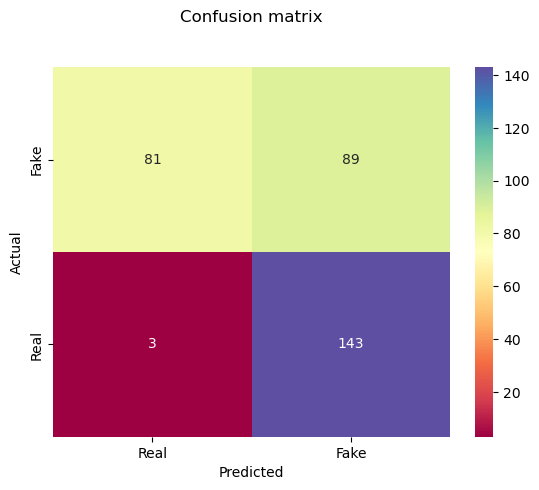

In [17]:
#Imports numpy,matplot and seaborn libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Renders the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.color_palette("Spectral", as_cmap=True) ,fmt='g',xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.ylabel('Actual') #Labels the Y axis as Actual
plt.xlabel('Predicted') #Labels the X axis as Predicted
plt.show()

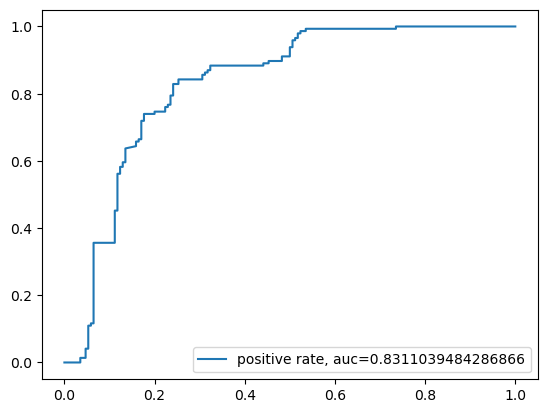

In [19]:
y_pred_proba = lrmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposrate, trueposrate, _ = metrics.roc_curve(y_test,  y_pred_proba) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba) #Calculates AUC scaore
plt.plot(falseposrate,trueposrate,label="positive rate, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.legend(loc=4) #Sets location of the legend
plt.show()

#Conclusion:
The logistic regression model yield an accuracy of 0.709 with and f1-score of 0.64 for real videos and 0.76 for fake videos and an ACU value of 0.831. This shows that this model can dectect the AI generated videos relatively well. But not as well as the previous dataset, singfake_metadata.